# Klasyfikacja zbioru CIFAR-100
Na podstawie kodu 02_03_deep_learning_conv_neural_network.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar100

**Dane**

In [ ]:
NUM_CLASSES = 100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

169001437/169001437 [==============================] - 10s 0us/step


**Budowa sieci**

In [ ]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                             

**Trenowanie sieci**

In [ ]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=25
          , shuffle=True
          , validation_data = (x_test, y_test))

model.save('cifar100_model2.h5')

Epoch 1/25
 382/1563 [======>.......................] - ETA: 2:07 - loss: 1.4603 - accuracy: 0.5858

KeyboardInterrupt: ignored

In [ ]:
model = load_model('cifar100_model2.h5')
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 8s 755ms/step - loss: 2.3788 - accuracy: 0.4159


[2.3787665367126465, 0.41589999198913574]

In [ ]:
CLASSES =  np.array(['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 9s 29ms/step


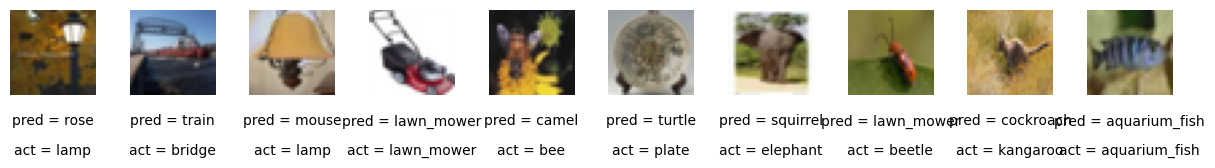

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

Wnioski pomiędzy pierwszą a drugą próbą klasyfikacji:
* Ten sam model sieci został użyty przy zbiorze CIFAR-10 gdzie dał lepsze dopsaowanie ~ 70%. Przy CIFAR-100 daje dopasowanie ~ 42% co wynika z większej liczby etykiet
* Pierwsza próba dała dobre dopsaowanie na zbiorze testowym, jednak na zbiorze treningowym dał  dopsowanie na poziomie 35% - nadmierne dopasowanie
* Przy drugiej próbie zamiast MaxPooling2D, zostało zamienione na BatchNormalization. Normalizacja wag daje lepsze rezultaty niż, dobieranie największych
* Po wartwie Dense dodano Dropout co zapobiega nadmiernemu dopasowaniu
